<a href="https://www.kaggle.com/code/ayushs9020/do-crabs-know-about-ai-eda?scriptVersionId=131515776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Do Crabs Know About AI 

```
A question that's been asked of many a mind,
Do crabs know about AI?
Can they understand the concept of a kind,
Or are they just left to their own?

Some say they do, and that they're quite aware,
Of the world around them and all its things,
But others say they're just dumb creatures there,
Whose only thought is to eat and drink.

So who knows the answer? I'm not sure myself,
But I think it's something we should all ponder,
For if crabs do know about AI,
Then maybe we're not as different as we ponder.
```

<img src = "https://pbs.twimg.com/profile_images/1238238472692998146/qA2fV06K_400x400.jpg">

# 1 | Data 🚀

The dataset contains over 10,000 observations of crabs, each with a variety of measurements, including carapace width, weight, and sex. The goal of the competition is to develop a model that can predict the age of a crab with as much accuracy as possible. The winning model will be the one that achieves the lowest root mean squared error (RMSE) on the test set.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [2]:
import numpy as np 


So this is our training dataset 

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
data

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


So we have $74,051$ rows and $10$ columns accounting to $7,40,510$ values.

The `id` column is like the primary key of the dataset. So lets jsut remove that 

In [5]:
data.drop("id" , axis = 1 , inplace = True)
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


# 2 | Data Analysis 📈

Data analysis is the process of inspecting, cleaning, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making. Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed.

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

## 2.1 | Sex

```
Female crabs reach maturity at a later age than male crabs.
This is because they need to grow larger shells to carry their eggs.
As a result, female crabs tend to live longer than male crabs.
```

<Axes: ylabel='Sex'>

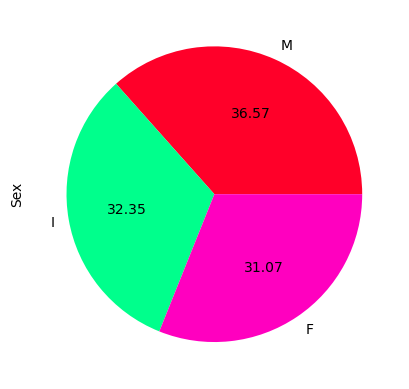

In [7]:
data["Sex"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

This is very close to a perfect divided graph. We do not need to do much of this in this column

## 2.2 Length

```
As the crab grows, it gets longer.
The longer the crab, the older it is.
This is because crabs grow at a steady rate.
Therefore, the length of a crab can be used to estimate its age.
```

<Axes: xlabel='Length', ylabel='Age'>

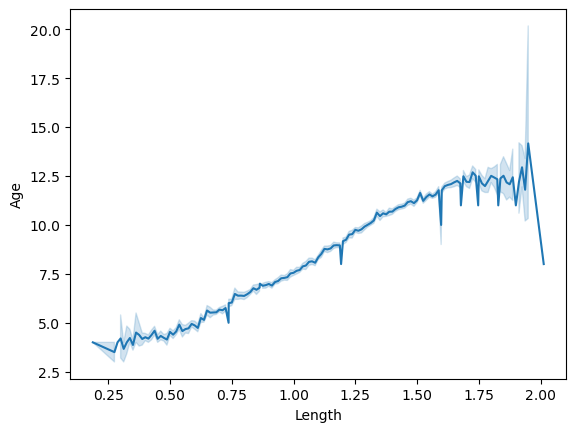

In [8]:
sns.lineplot(x = data["Length"] , y = data["Age"])

This is kind of a `Straight Line` which is good for `Linear Regression`. 

## 2.3 | Diameter

```
As the crab grows, its diameter increases.
The larger the crab, the older it is.
This is because crabs grow at a steady rate.
So, the diameter of a crab can be used to estimate its age.
```

<Axes: xlabel='Diameter', ylabel='Age'>

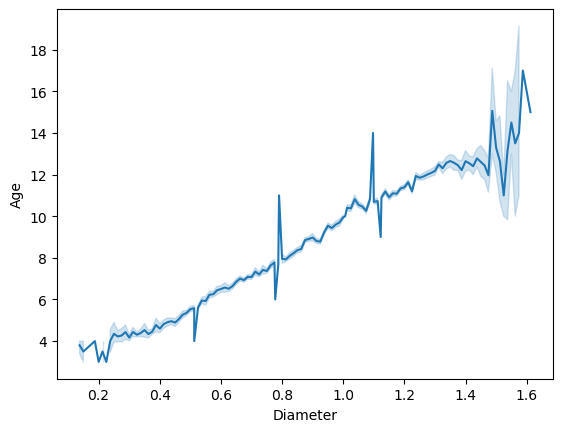

In [9]:
sns.lineplot(x = data["Diameter"] , y = data["Age"])

This also kind of resembles a `Straight Line` , it will be great for `Linear Regression`

## 2.4 | Height

```
As a crab grows older, it gets taller.
The height of a crab can be used to estimate its age.
This is because crabs grow at a relatively consistent rate.
However, there are other factors that can affect the height of a crab, such as its diet and environment.
```

<Axes: >

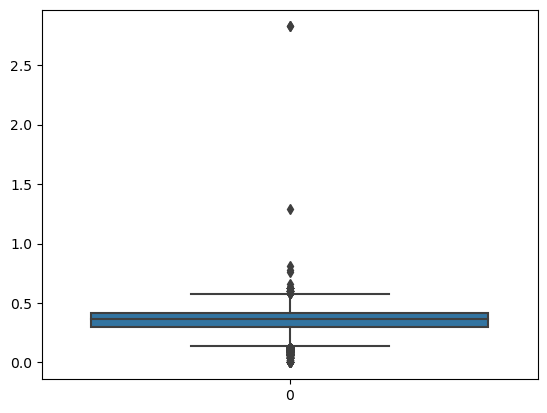

In [10]:
sns.boxplot(data["Height"])

Values above $0.6$ for this column act as a outlier. We will replace those values with `mean`

In [11]:
data["Height"] = np.where(data["Height"] > 0.6 , float(data["Height"].mean()) , data["Height"])

Now the graph will look much better 

<Axes: xlabel='Height', ylabel='Density'>

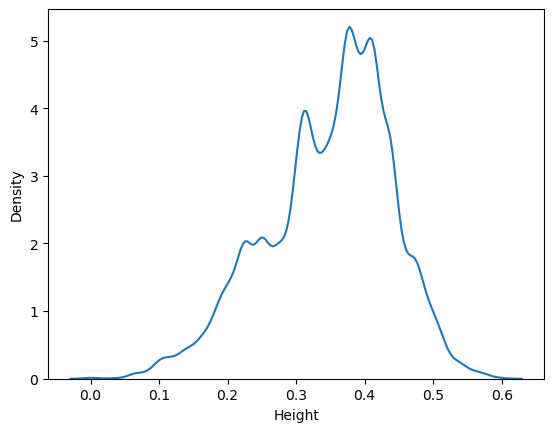

In [12]:
sns.kdeplot(data["Height"])

<Axes: xlabel='Height', ylabel='Age'>

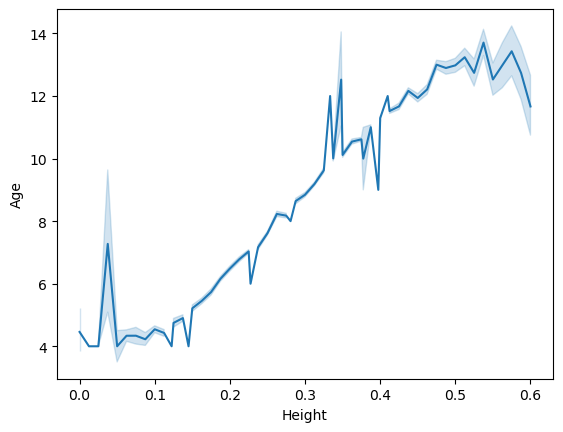

In [13]:
sns.lineplot(x = data["Height"] , y = data["Age"])

And now it also resembles a `straight line`

## 2.5 | Weight 

```
A crab's weight increases with age.
However, other factors, such as diet and environment, can also affect a crab's weight.
Therefore, the weight of a crab can be used as a rough estimate of its age, but it is not a perfect indicator.
```

<Axes: xlabel='Weight', ylabel='Age'>

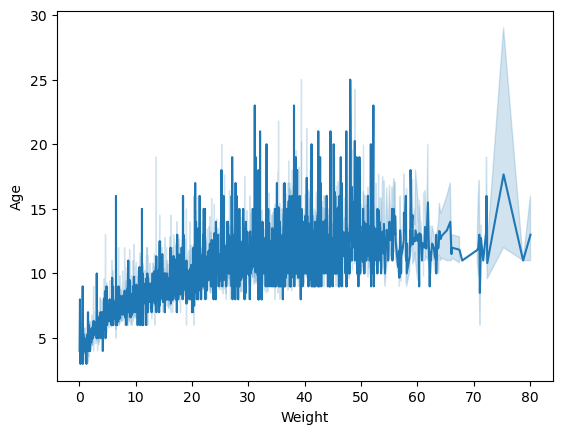

In [14]:
sns.lineplot(x = data["Weight"] , y = data["Age"])

We need to do a lot of work on this column. It is very much crowded

## 2.6 | Shucked Weight

```
Shucked weight can be used to estimate the age of a crab.
However, it is not a perfect indicator, as other factors can affect the weight of a crab.
These factors include diet, environment, and sex.
Therefore, shucked weight should be used as a rough estimate of the age of a crab.
```

<Axes: xlabel='Shucked Weight', ylabel='Age'>

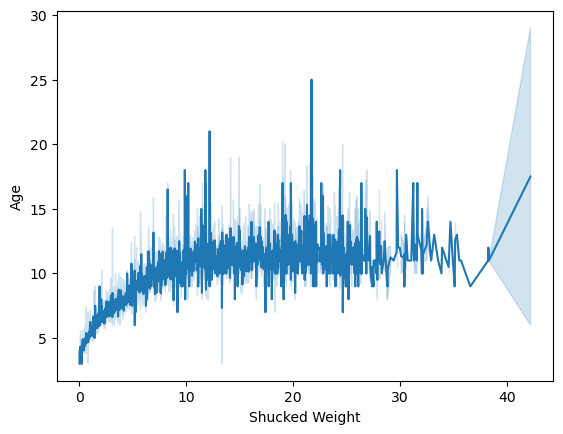

In [15]:
sns.lineplot(x = data["Shucked Weight"] , y = data["Age"])

We need to do a lot of work on this column. It is very much crowded

## 2.7 | Viscera Weight 

```
Viscera weight increases with age.
Viscera weight can be used to estimate the age of a crab.
However, other factors, such as diet and environment, can also affect a crab's viscera weight.
Therefore, viscera weight should be used as a rough estimate of a crab's age.
```

<Axes: xlabel='Viscera Weight', ylabel='Age'>

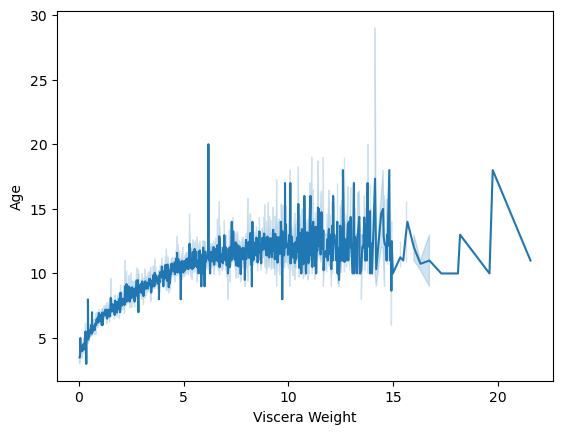

In [16]:
sns.lineplot(x = data["Viscera Weight"] , y = data["Age"])

We need to do a lot of work on this column. It is very much crowded

# 2.8 | Shell Weight

```
The shell weight of a crab increases with age.
The rate of increase in shell weight is not linear.
Therefore, the shell weight of a crab can be used as a rough estimate of its age, but it is not a perfect indicator.
Other factors, such as diet and environment, can also affect the shell weight of a crab.
```

<Axes: xlabel='Shell Weight', ylabel='Age'>

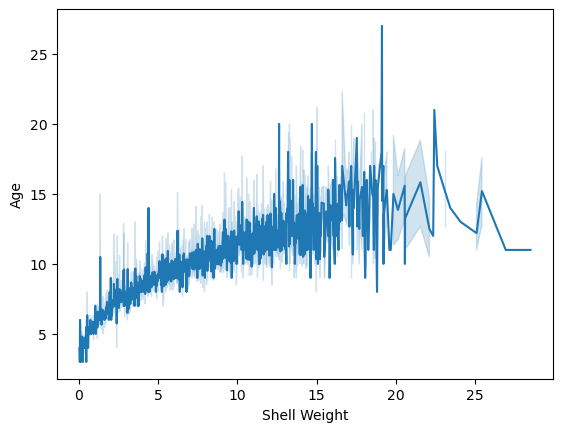

In [17]:
sns.lineplot(x = data["Shell Weight"] , y = data["Age"])

We need to do a lot of work on this column. It is very much crowded

# 3 | Conclusion 

After all this analysis we came to a conclusion 

```
Yes Crabs Know About AI

Oh, the things that crabs know,
They'll tell you if you'll let them go.
They know about AI,
And they're not afraid to say it,
They'll tell you all about it,
If you'll just let them out of their bucket.

So next time you see a crab,
Don't be afraid to ask,
They'll tell you all about AI,
And they'll do it with a smile.
```

# 6 | TO DO LIST 

```
TO DO 1 : CLEAN THE DATA

TO DO 2 : TRAIN BASIC MACHINE LEARNING MODELS

TO DO 3 : GET GOOD SCORES

TO DO 4 : TRAIN A NEURAL NETWORK

TO DO 5 : ADD WANDB SUPPORT 

TO DO 6 : IMPROVE THE SOCRES

TO DO 7 : BECOME A CRAB 
```

# 8 | Ending 

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $!!!$**